In [2]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/KoPubDotumMedium.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

## Import Python Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import plotly.plotly as py

import seaborn as sns

### 기온/습도/강수량/기압2/풍속

In [6]:
temp = pd.read_csv("./Prepare/temp.csv")
humid = pd.read_csv("./Prepare/humid.csv")
rain = pd.read_csv("./Prepare/rain.csv")
rainday = pd.read_csv("./Prepare/rainday.csv")
atmos = pd.read_csv("./Prepare/atmos.csv")
sea = pd.read_csv("./Prepare/sea.csv")
wspeed = pd.read_csv("./Prepare/wspeed.csv")

In [45]:
solar = pd.read_csv("./Prepare/solar.csv")
solarday = pd.read_csv("./Prepare/solarday.csv")
wdirect = pd.read_csv("./Prepare/wdirect.csv")

In [8]:
temp.head()

,t1,t2,t3,t4,t5
0,9.7,12.2,12.3,8.2,10.7
1,9.3,12.1,12.1,8.3,10.3
2,9.4,12.1,12.1,8.0,9.7
3,9.4,12.0,12.1,7.7,9.4
4,9.2,12.0,12.0,7.4,9.4


In [9]:
color = ['r','b','g','m','y']

## 1-1) 습도/강수량

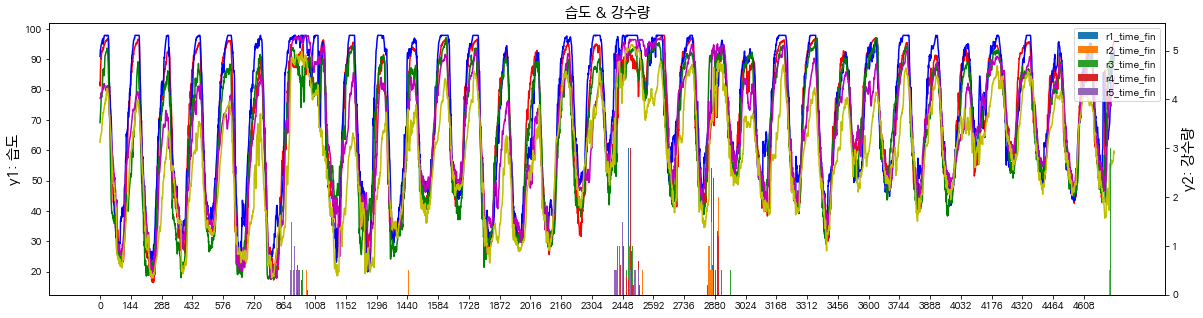

In [12]:
plt.figure(figsize=(20,5))
plt.title("습도 & 강수량", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

for i in range(len(humid.columns)):
    ax1.plot(humid.index,humid.iloc[:,i], color = color[i],
            label = list(humid.columns)[i])
    
ax1.set_ylabel('y1: 습도', fontsize=15)


for i in range(len(rainday.columns)):
    ax2.bar(rainday.index, rainday.iloc[:,i],
            label = list(rainday.columns)[i])
    


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
ax2.set_ylabel("y2: 강수량", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

## 1-2) 습도/강수량 평균

In [24]:
humid["h_mean"]  = humid.mean(axis=1)

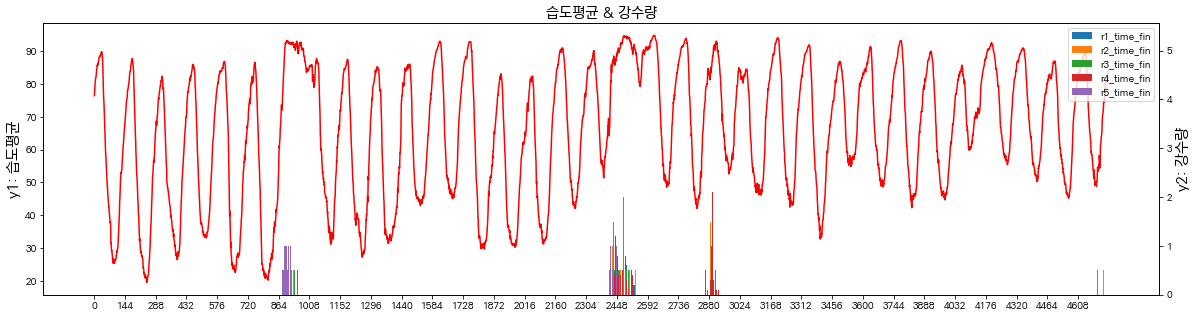

In [17]:
plt.figure(figsize=(20,5))
plt.title("습도평균 & 강수량", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)):
ax1.plot(humid.index,humid.iloc[:,-1], color = 'r',
        label = list(humid.columns)[-1])
    
ax1.set_ylabel('y1: 습도평균', fontsize=15)


for i in range(len(rainday.columns)):
    ax2.bar(rainday.index, rainday.iloc[:,i],
            label = list(rainday.columns)[i])
    


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
ax2.set_ylabel("y2: 강수량", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

## 2-1) 기온/습도

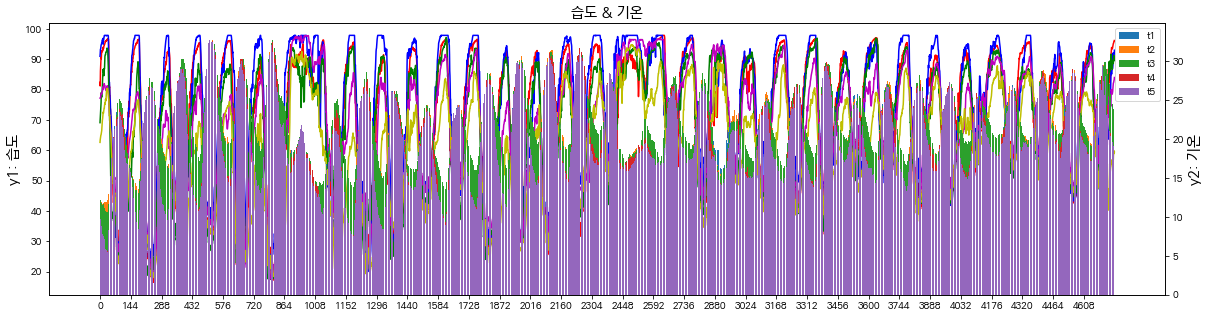

In [19]:
plt.figure(figsize=(20,5))
plt.title("습도 & 기온", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

for i in range(len(humid.columns)-1):
    ax1.plot(humid.index,humid.iloc[:,i], color = color[i],
            label = list(humid.columns)[i])
    
ax1.set_ylabel('y1: 습도', fontsize=15)


for i in range(len(temp.columns)):
    ax2.bar(temp.index, temp.iloc[:,i],
            label = list(temp.columns)[i])
    


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
ax2.set_ylabel("y2: 기온", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

## 2-2) 습도/기온 평균

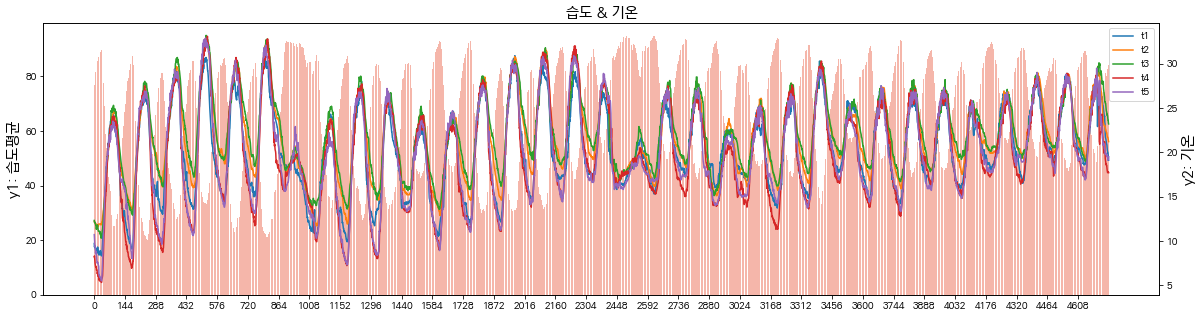

In [22]:
plt.figure(figsize=(20,5))
plt.title("습도 & 기온", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)-1):
#     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
#             label = list(humid.columns)[i])
    

for i in range(len(temp.columns)):
    ax2.plot(temp.index, temp.iloc[:,i],
            label = list(temp.columns)[i])
    

    
ax2.set_ylabel('y2: 기온', fontsize=15)


ax1.bar(humid.index,humid.iloc[:,-1], color = '#f29886',
        label = list(humid.columns)[-1], alpha = 0.7)
    
ax1.set_ylabel('y1: 습도평균', fontsize=15)


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
# ax2.set_ylabel("y2: 습도", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

#### 번외) 기온-습도 correlation

In [27]:
temp_humid = humid[["h_mean"]]

In [29]:
temp_humid["t_mean"] = temp.mean(axis=1)

c:\users\julia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
temp_humid.corr()

,h_mean,t_mean
h_mean,1.000000,-0.791927
t_mean,-0.791927,1.000000


## 3-1) 기온/해면기압

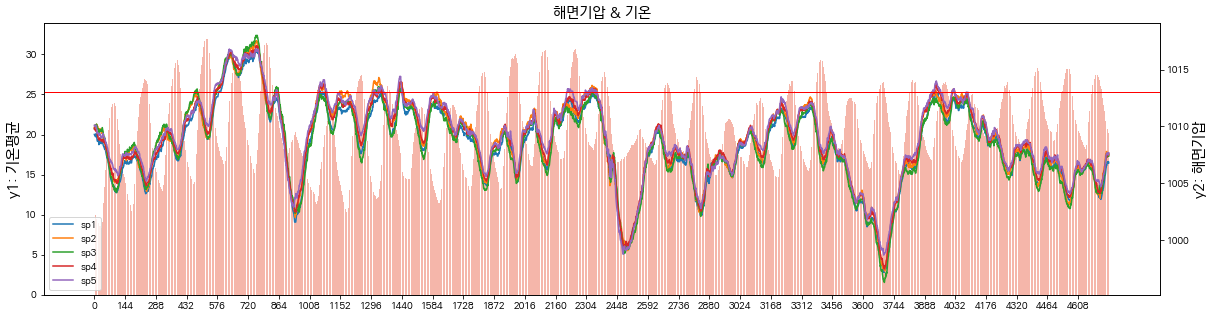

In [36]:
plt.figure(figsize=(20,5))
plt.title("해면기압 & 기온", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)-1):
#     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
#             label = list(humid.columns)[i])
    

for i in range(len(sea.columns)):
    ax2.plot(sea.index, sea.iloc[:,i],
            label = list(sea.columns)[i])
    

    
ax2.set_ylabel('y2: 해면기압', fontsize=15)
ax2.axhline(y=1013, color='r', linewidth=1)


ax1.bar(temp_humid.index,temp_humid.iloc[:,-1], color = '#f29886',
        label = list(temp_humid.columns)[-1], alpha = 0.7)
    
ax1.set_ylabel('y1: 기온평균', fontsize=15)


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
# ax2.set_ylabel("y2: 습도", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

## 4-1) 해면기압/강수량

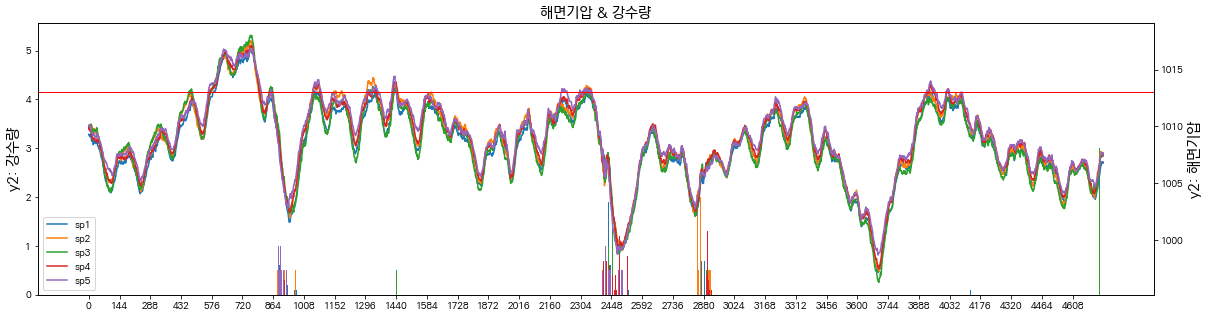

In [38]:
plt.figure(figsize=(20,5))
plt.title("해면기압 & 강수량", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)-1):
#     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
#             label = list(humid.columns)[i])
    

for i in range(len(sea.columns)):
    ax2.plot(sea.index, sea.iloc[:,i],
            label = list(sea.columns)[i])
    

    
ax2.set_ylabel('y2: 해면기압', fontsize=15)

ax2.axhline(y=1013, color='r', linewidth=1)



for i in range(len(rainday.columns)):
    ax1.bar(rainday.index, rainday.iloc[:,i],
            label = list(rainday.columns)[i])
    


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
ax1.set_ylabel("y2: 강수량", fontsize=15)

# ax1.bar(temp_humid.index,temp_humid.iloc[:,-1], color = '#f29886',
#         label = list(temp_humid.columns)[-1], alpha = 0.7)
    
# ax1.set_ylabel('y1: 기온평균', fontsize=15)


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
# ax2.set_ylabel("y2: 습도", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

## 5-1) 해면기압/풍속

In [39]:
wspeed["ws_mean"] = wspeed.mean(axis=1)

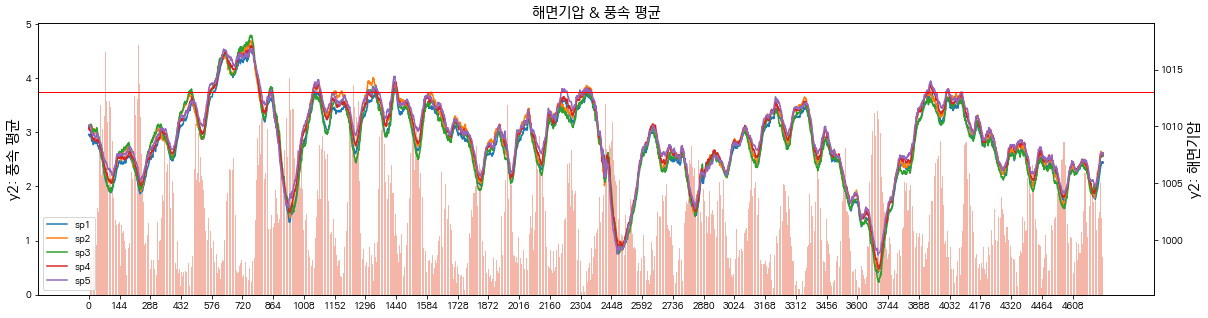

In [43]:
plt.figure(figsize=(20,5))
plt.title("해면기압 & 풍속 평균", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)-1):
#     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
#             label = list(humid.columns)[i])
    

for i in range(len(sea.columns)):
    ax2.plot(sea.index, sea.iloc[:,i],
            label = list(sea.columns)[i])
    

    
ax2.set_ylabel('y2: 해면기압', fontsize=15)

ax2.axhline(y=1013, color='r', linewidth=1)



# for i in range(len(rainday.columns)):
ax1.bar(wspeed.index, wspeed.iloc[:,-1], color = '#f29886',
        label = list(wspeed.columns)[-1], alpha = 0.7)
    


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
ax1.set_ylabel("y2: 풍속 평균", fontsize=15)

# ax1.bar(temp_humid.index,temp_humid.iloc[:,-1], color = '#f29886',
#         label = list(temp_humid.columns)[-1], alpha = 0.7)
    
# ax1.set_ylabel('y1: 기온평균', fontsize=15)


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
# ax2.set_ylabel("y2: 습도", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

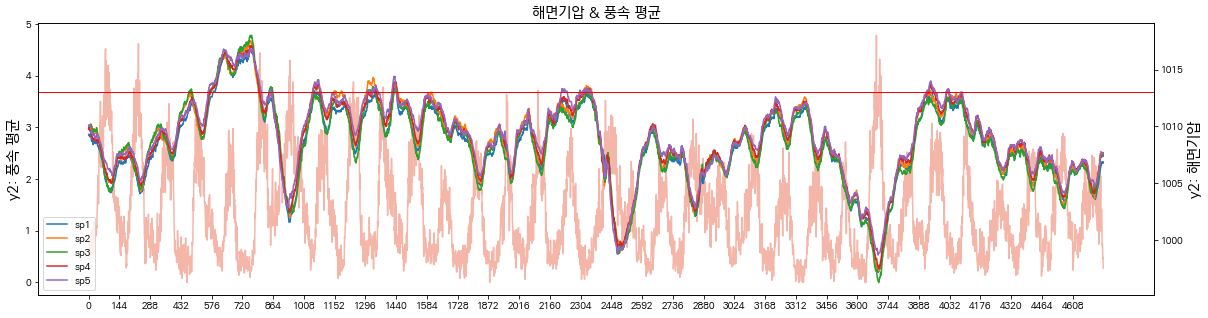

In [44]:
plt.figure(figsize=(20,5))
plt.title("해면기압 & 풍속 평균", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)-1):
#     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
#             label = list(humid.columns)[i])
    

for i in range(len(sea.columns)):
    ax2.plot(sea.index, sea.iloc[:,i],
            label = list(sea.columns)[i])
    

    
ax2.set_ylabel('y2: 해면기압', fontsize=15)

ax2.axhline(y=1013, color='r', linewidth=1)



# for i in range(len(rainday.columns)):
ax1.plot(wspeed.index, wspeed.iloc[:,-1], color = '#f29886',
        label = list(wspeed.columns)[-1], alpha = 0.7)
    


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
ax1.set_ylabel("y2: 풍속 평균", fontsize=15)

# ax1.bar(temp_humid.index,temp_humid.iloc[:,-1], color = '#f29886',
#         label = list(temp_humid.columns)[-1], alpha = 0.7)
    
# ax1.set_ylabel('y1: 기온평균', fontsize=15)


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
# ax2.set_ylabel("y2: 습도", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

 ## 6-1) 기온/일사량 

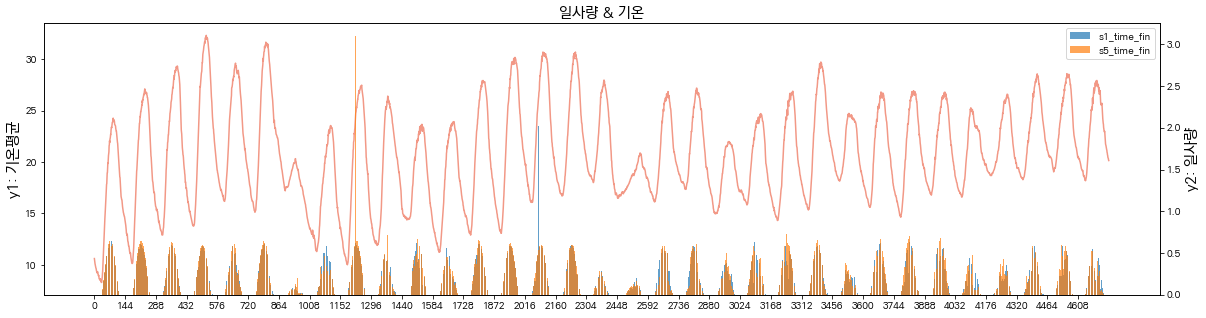

In [48]:
plt.figure(figsize=(20,5))
plt.title("일사량 & 기온", fontsize=15)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

# for i in range(len(humid.columns)-1):
#     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
#             label = list(humid.columns)[i])
    

for i in range(len(solarday.columns)):
    ax2.bar(solarday.index, solarday.iloc[:,i],
            label = list(solarday.columns)[i], alpha = 0.7)
    

    
ax2.set_ylabel('y2: 일사량', fontsize=15)
# ax2.axhline(y=1013, color='r', linewidth=1)


ax1.plot(temp_humid.index,temp_humid.iloc[:,-1], color = '#f29886',
        label = list(temp_humid.columns)[-1])
    
ax1.set_ylabel('y1: 기온평균', fontsize=15)


# ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
# ax2.set_ylabel("y2: 습도", fontsize=15)


plt.legend()
plt.xticks(np.arange(0, len(temp), step=144))
# plt.tight_layout()
# plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
plt.show()

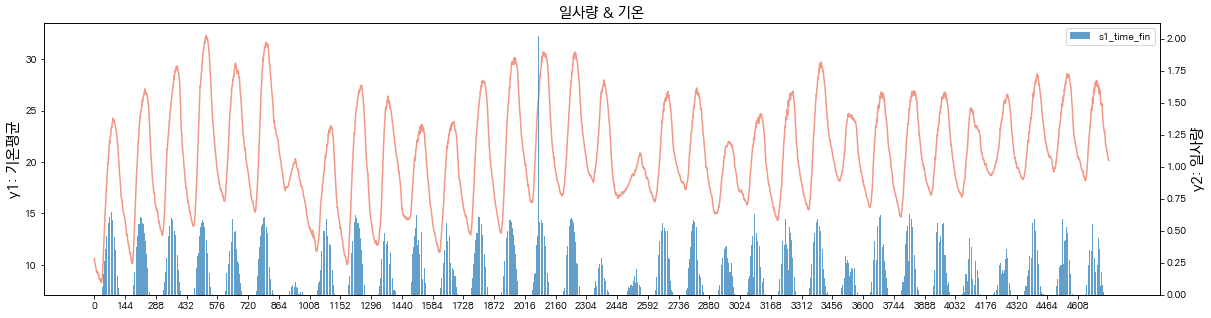

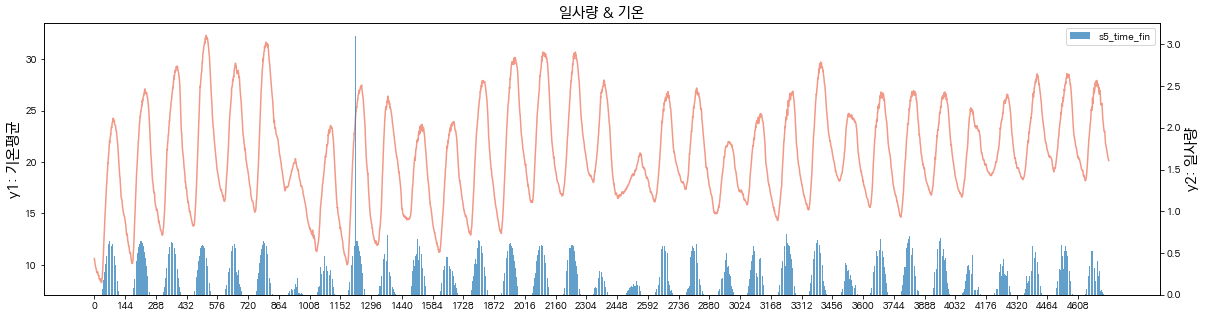

In [49]:
for i in range(len(solarday.columns)):
    plt.figure(figsize=(20,5))
    plt.title("일사량 & 기온", fontsize=15)
    ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

    # for i in range(len(humid.columns)-1):
    #     ax2.plot(humid.index,humid.iloc[:,i], color = color[i],
    #             label = list(humid.columns)[i])


#     for i in range(len(solarday.columns)):
    ax2.bar(solarday.index, solarday.iloc[:,i],
            label = list(solarday.columns)[i], alpha = 0.7)



    ax2.set_ylabel('y2: 일사량', fontsize=15)
    # ax2.axhline(y=1013, color='r', linewidth=1)


    ax1.plot(temp_humid.index,temp_humid.iloc[:,-1], color = '#f29886',
            label = list(temp_humid.columns)[-1])

    ax1.set_ylabel('y1: 기온평균', fontsize=15)


    # ax2.bar(sensor18.iloc[:,0], sensor18.iloc[:,1], color = "y")
    # ax2.set_ylabel("y2: 습도", fontsize=15)


    plt.legend()
    plt.xticks(np.arange(0, len(temp), step=144))
    # plt.tight_layout()
    # plt.savefig('../../assets/images/markdown_img/180618_1735_twinx.svg')
    plt.show()

#### 번외) 기온-일사량 correlation

In [50]:
temp_solar = solarday.copy()

In [51]:
temp_solar["t_mean"] = temp.mean(axis=1)

In [52]:
temp_solar.corr()

,s1_time_fin,s5_time_fin,t_mean
s1_time_fin,1.000000,0.912959,0.624440
s5_time_fin,0.912959,1.000000,0.606201
t_mean,0.624440,0.606201,1.000000
